In [1]:
#Topic Modeling using Transformer Embeddings

In [2]:
!pip install transformers torch sentence-transformers scikit-learn matplotlib tqdm

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


c:\Users\vikas\anaconda3\envs\denoisingaudio\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_csv("../data/constitution_chunks.csv")
df.head()


,sentence
0,"£ÉÉ®iÉ BÉEÉ ºÉÆÉÊ´ÉvÉÉxÉ [1 , 2024 ] THE CONST..."
1,"In this edition, the text of the Constitution ..."
2,The foot notes below the text indicate the Con...
3,The Constitution (One Hundredth Amendment) Act...
4,The Constitution (Application to Jammu and Kas...


In [5]:
df = df[df["sentence"].str.len() > 50]
df = df.reset_index(drop=True)

len(df)


3352

In [6]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

Generate Sentence Embeddings

Right to equality and Prohibition of discrimination -> same meaning but diffrent word

In [7]:
sentences = df["sentence"].tolist()

embeddings = embedding_model.encode(
    sentences,
    batch_size=32,
    show_progress_bar=True
)

embeddings.shape


Batches: 100%|██████████| 105/105 [01:17<00:00,  1.36it/s]


(3352, 384)

In [8]:
#Each sentence → 384-dimensional embedding

Decide Optimal Number of Topics (Evaluation Metric)

Silhouette Score

In [9]:
scores = {}
K_RANGE = range(4, 11)

for k in K_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    scores[k] = score

scores


{4: np.float32(0.069634356),
 5: np.float32(0.07288308),
 6: np.float32(0.06268272),
 7: np.float32(0.06262503),
 8: np.float32(0.06532102),
 9: np.float32(0.06681498),
 10: np.float32(0.06401654)}

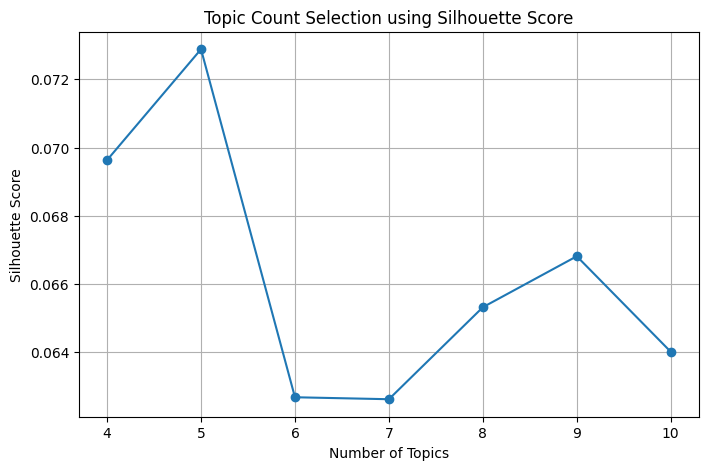

In [10]:
plt.figure(figsize=(8,5))
plt.plot(list(scores.keys()), list(scores.values()), marker="o")
plt.xlabel("Number of Topics")
plt.ylabel("Silhouette Score")
plt.title("Topic Count Selection using Silhouette Score")
plt.grid(True)
plt.show()


k = 5

In [11]:
NUM_TOPICS = 5

kmeans = KMeans(
    n_clusters=NUM_TOPICS,
    random_state=42,
    n_init=20
)

df["topic"] = kmeans.fit_predict(embeddings)
df.head()

,sentence,topic
0,"£ÉÉ®iÉ BÉEÉ ºÉÆÉÊ´ÉvÉÉxÉ [1 , 2024 ] THE CONST...",0
1,"In this edition, the text of the Constitution ...",0
2,The foot notes below the text indicate the Con...,3
3,The Constitution (One Hundredth Amendment) Act...,0
4,The Constitution (Application to Jammu and Kas...,0


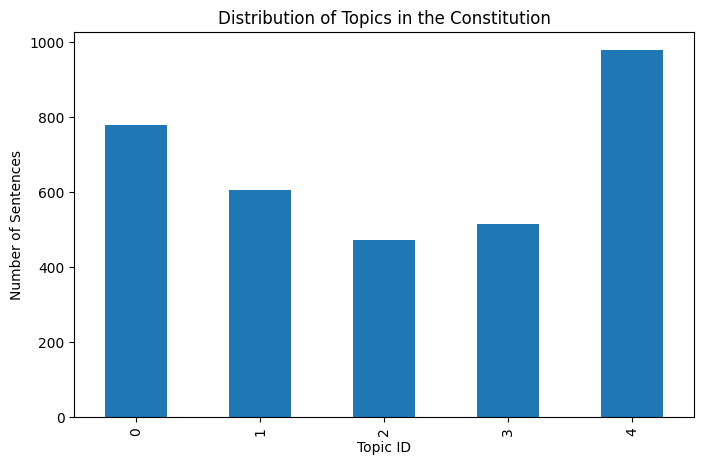

In [12]:
topic_counts = df["topic"].value_counts().sort_index()

plt.figure(figsize=(8,5))
topic_counts.plot(kind="bar")
plt.xlabel("Topic ID")
plt.ylabel("Number of Sentences")
plt.title("Distribution of Topics in the Constitution")
plt.show()


Extract representative sentences per topi

In [13]:
def show_topic_examples(topic_id, n=5):
    print(f"\n🔹 Topic {topic_id}")
    samples = df[df["topic"] == topic_id]["sentence"].head(n)
    for s in samples:
        print("-", s[:200], "...")


In [14]:
for t in range(NUM_TOPICS):
    show_topic_examples(t)



🔹 Topic 0
- £ÉÉ®iÉ BÉEÉ ºÉÆÉÊ´ÉvÉÉxÉ [1 , 2024 ] THE CONSTITUTION OF INDIA [As on 1st May, 2024] 2024 GOVERNMENT OF INDIA MINISTRY OF LAW AND JUSTICE LEGISLATIVE DEPARTMENT,OFFICIAL LANGUAGES WING PREFACE This is ...
- In this edition, the text of the Constitution of India has been brought up-to-date by incorporating therein all the amendments up to the Constitution (One Hundred and Sixth Amendment) Act, 2023. ...
- The Constitution (One Hundredth Amendment) Act, 2015 containing details of acquired and transferred territories between the Governments of India and Bangladesh has been provided in AppendixI. ...
- The Constitution (Application to Jammu and Kashmir) Order, 2019 and the declaration under article 370(3) of the Constitution have been provided respectively in Appendix II and Appendix IIIfor referenc ...
- New Delhi; Dr.Rajiv Mani, 1stMay, 2024 Secretary to the Government of India. ...

🔹 Topic 1
- ....................................................forArticle, articles. ...
- 

governance, structural organization, legal evolution, and citizenship,

In [ ]:
df.to_csv("../data/constitution_topics.csv", index=False)


: 

We used transformer-based sentence embeddings to capture semantic meaning, followed by clustering using KMeans. Topic count was selected using Silhouette Score, ensuring quantitative validation rather than arbitrary choice